In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_olivetti_faces
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix

In [2]:
data = fetch_olivetti_faces()

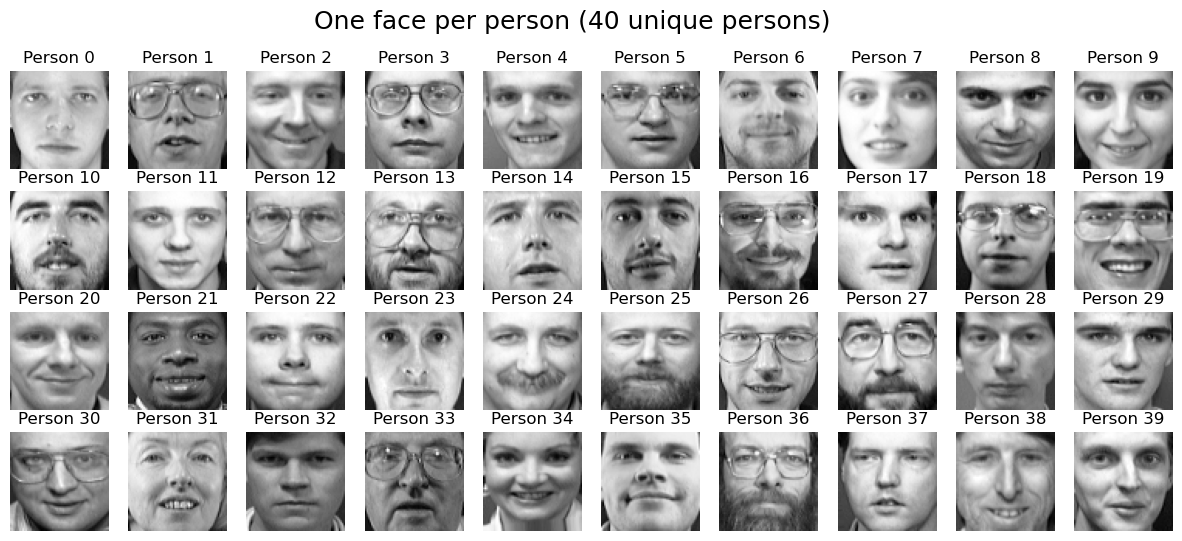

In [3]:
def display_unique_faces(images, target):
    unique_ids = np.unique(target)
    fig = plt.figure(figsize=(15, 6))
    for i, person_id in enumerate(unique_ids):
        index = np.where(target == person_id)[0][0]
        ax = fig.add_subplot(4, 10, i + 1)
        ax.imshow(images[index], cmap='gray')
        ax.set_title(f"Person {person_id}")
        ax.axis('off')
    plt.suptitle("One face per person (40 unique persons)",fontsize=18)
    
    plt.show()
display_unique_faces(data.images, data.target)

In [4]:
X = data.data
y = data.target

In [5]:
x_train, x_test, y_train, y_test = train_test_split(X, y,
test_size=0.3, random_state=42)
print("x_train shape:", x_train.shape)
print("x_test shape:", x_test.shape)

x_train shape: (280, 4096)
x_test shape: (120, 4096)


In [6]:
model = GaussianNB()
model.fit(x_train, y_train)

GaussianNB()

In [7]:
y_pred = model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred) * 100
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:\n", cm)
print(f"\nNaive Bayes Accuracy: {accuracy:.2f}%")


Confusion Matrix:
 [[3 0 0 ... 0 0 0]
 [0 3 0 ... 0 0 0]
 [0 0 2 ... 0 0 0]
 ...
 [0 0 0 ... 3 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 4]]

Naive Bayes Accuracy: 74.17%
